In [1]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import numpy as np

In [2]:
torch.manual_seed(1)

In [3]:
x = np.expand_dims(np.arange(-1.5, 1.5, 0.01), 1)
print(x.shape)
y = np.sign(np.sin(5*np.pi*x))
print(y.shape)

(300, 1)
(300, 1)


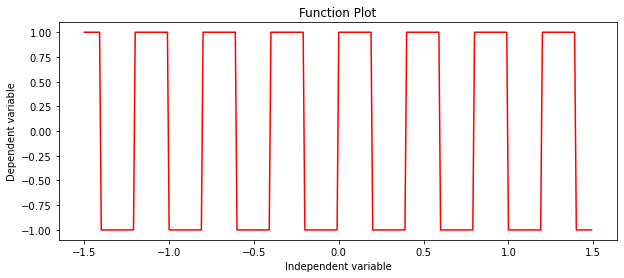

In [4]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")

plt.title('Function Plot')
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [5]:
def model_train(model, x, y):
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)  
        loss = loss_func(prediction, y)
        optimizer.zero_grad() #clear gradients for next epoch
        loss.backward() #compute gradients using back propogation
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch % 500 == 0: 
            print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False

        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print("Convergence reached for loss:",loss_arr[-1])
                not_converged = False
                
    return epoch_arr,loss_arr,prediction

In [6]:
class Model1(nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.linear1 = nn.Linear(1, 5)
        self.linear2 = nn.Linear(5, 10)
        self.linear3 = nn.Linear(10, 10)
        self.linear4 = nn.Linear(10, 10)
        self.linear5 = nn.Linear(10, 10)
        self.linear6 = nn.Linear(10, 10)
        self.linear7 = nn.Linear(10, 5)
        self.predict = nn.Linear(5, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))
        x = nn.functional.leaky_relu(self.linear5(x))
        x = nn.functional.leaky_relu(self.linear6(x))
        x = nn.functional.leaky_relu(self.linear7(x))

        x = self.predict(x)
        return x

In [7]:
model_sign_1 = Model1()
optimizer = torch.optim.RMSprop(model_sign_1.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # mean squared loss
pytorch_total_params = sum(p.numel() for p in model_sign_1.parameters())
print(pytorch_total_params)
m1_epoch_arr, m1_loss_arr, m1_prediction = model_train(model_sign_1, x, y)

571
epoch: 500, loss = 0.9884
epoch: 1000, loss = 0.9025
epoch: 1500, loss = 0.7084
epoch: 2000, loss = 0.6088
epoch: 2500, loss = 0.3458
epoch: 3000, loss = 0.3258
epoch: 3500, loss = 0.3027
epoch: 4000, loss = 0.2626
epoch: 4500, loss = 0.3339
epoch: 5000, loss = 0.2706
epoch: 5500, loss = 0.3078
epoch: 6000, loss = 0.2722
epoch: 6500, loss = 0.2653
epoch: 7000, loss = 0.2054
epoch: 7500, loss = 0.1706
epoch: 8000, loss = 0.1935
epoch: 8500, loss = 0.1353
epoch: 9000, loss = 0.1377
epoch: 9500, loss = 0.0878
epoch: 10000, loss = 0.1228
epoch: 10500, loss = 0.0933
epoch: 11000, loss = 0.1835
epoch: 11500, loss = 0.0867
epoch: 12000, loss = 0.0926
epoch: 12500, loss = 0.0841
epoch: 13000, loss = 0.0985
epoch: 13500, loss = 0.0911
epoch: 14000, loss = 0.1437
epoch: 14500, loss = 0.0898
epoch: 15000, loss = 0.0683
epoch: 15500, loss = 0.1039
epoch: 16000, loss = 0.1157
epoch: 16500, loss = 0.0693
epoch: 17000, loss = 0.1047
epoch: 17500, loss = 0.0527
epoch: 18000, loss = 0.0727
epoch: 1

In [8]:
class Model2(nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.linear1 = nn.Linear(1, 10)
        self.linear2 = nn.Linear(10, 18)
        self.linear3 = nn.Linear(18, 15)
        self.linear4 = nn.Linear(15, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))
        x = nn.functional.leaky_relu(self.linear2(x))
        x = nn.functional.leaky_relu(self.linear3(x))
        x = nn.functional.leaky_relu(self.linear4(x))

        x = self.predict(x)
        return x

In [9]:
model_sign_2 = Model2()
optimizer = torch.optim.Adam(model_sign_2.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 
pytorch_total_params = sum(p.numel() for p in model_sign_2.parameters())
print(pytorch_total_params)
m2_epoch_arr, m2_loss_arr, m2_prediction = model_train(model_sign_2, x, y)

572
epoch: 500, loss = 0.9944
epoch: 1000, loss = 0.6969
epoch: 1500, loss = 0.4446
epoch: 2000, loss = 0.3509
epoch: 2500, loss = 0.3047
epoch: 3000, loss = 0.2738
epoch: 3500, loss = 0.2420
epoch: 4000, loss = 0.2160
epoch: 4500, loss = 0.1896
epoch: 5000, loss = 0.1738
epoch: 5500, loss = 0.1697
epoch: 6000, loss = 0.1586
epoch: 6500, loss = 0.1565
epoch: 7000, loss = 0.1523
epoch: 7500, loss = 0.1505
epoch: 8000, loss = 0.1498
epoch: 8500, loss = 0.1480
epoch: 9000, loss = 0.1513
epoch: 9500, loss = 0.1445
epoch: 10000, loss = 0.1442
epoch: 10500, loss = 0.1433
epoch: 11000, loss = 0.1430
epoch: 11500, loss = 0.1508
epoch: 12000, loss = 0.1444
epoch: 12500, loss = 0.1418
epoch: 13000, loss = 0.1402
epoch: 13500, loss = 0.1397
epoch: 14000, loss = 0.1395
epoch: 14500, loss = 0.1391
epoch: 15000, loss = 0.1389
epoch: 15500, loss = 0.1426
epoch: 16000, loss = 0.1379
epoch: 16500, loss = 0.1567
epoch: 17000, loss = 0.1373
epoch: 17500, loss = 0.1397
epoch: 18000, loss = 0.1369
epoch: 1

In [10]:
class Model3(nn.Module):
    def __init__(self,):
        super(Model3, self).__init__()
        self.linear1 = nn.Linear(1, 190)
        self.predict = nn.Linear(190, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear1(x))

        x = self.predict(x)
        return x

In [11]:
model_sign_3 = Model3()
optimizer = torch.optim.Adam(model_sign_3.parameters(), lr = 1e-3, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()
pytorch_total_params = sum(p.numel() for p in model_sign_3.parameters())
print(pytorch_total_params)
m3_epoch_arr, m3_loss_arr, m3_prediction = model_train(model_sign_3, x, y)

571
epoch: 500, loss = 0.9100
epoch: 1000, loss = 0.6976
epoch: 1500, loss = 0.5166
epoch: 2000, loss = 0.3998
epoch: 2500, loss = 0.3296
epoch: 3000, loss = 0.2889
epoch: 3500, loss = 0.2648
epoch: 4000, loss = 0.2496
epoch: 4500, loss = 0.2396
epoch: 5000, loss = 0.2329
epoch: 5500, loss = 0.2281
epoch: 6000, loss = 0.2236
epoch: 6500, loss = 0.2197
epoch: 7000, loss = 0.2169
epoch: 7500, loss = 0.2126
epoch: 8000, loss = 0.2098
epoch: 8500, loss = 0.2078
epoch: 9000, loss = 0.2059
epoch: 9500, loss = 0.2041
epoch: 10000, loss = 0.2021
epoch: 10500, loss = 0.2010
epoch: 11000, loss = 0.1996
epoch: 11500, loss = 0.1985
epoch: 12000, loss = 0.1977
epoch: 12500, loss = 0.1966
epoch: 13000, loss = 0.1960
epoch: 13500, loss = 0.1949
epoch: 14000, loss = 0.1942
epoch: 14500, loss = 0.1936
epoch: 15000, loss = 0.1925
epoch: 15500, loss = 0.1919
epoch: 16000, loss = 0.1917
epoch: 16500, loss = 0.1906
epoch: 17000, loss = 0.1901
epoch: 17500, loss = 0.1895
epoch: 18000, loss = 0.1889
epoch: 1

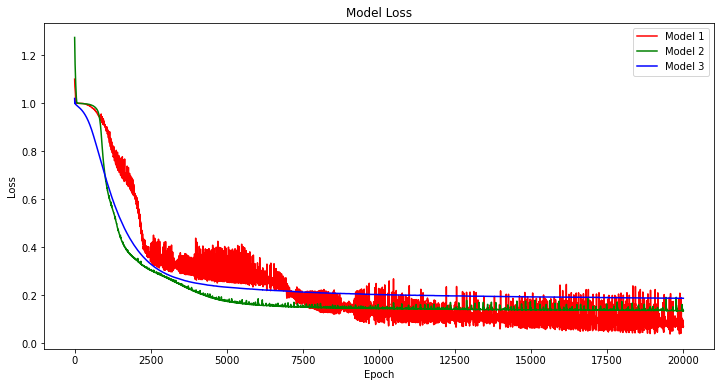

In [12]:
plt.figure(figsize=(12,6))
plt.plot(m1_epoch_arr, m1_loss_arr, color = "r")
plt.plot(m2_epoch_arr, m2_loss_arr, color = "g")
plt.plot(m3_epoch_arr, m3_loss_arr, color = "b")
plt.title('Model Loss')
plt.legend(['Model 1', 'Model 2','Model 3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

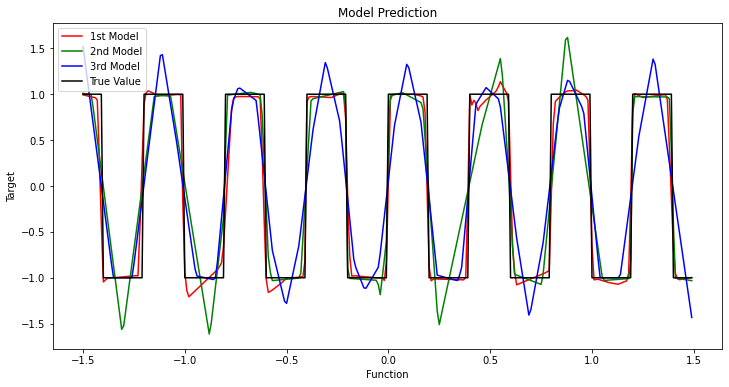

In [13]:
plt.figure(figsize=(12,6))
plt.plot(x, m1_prediction.data, color="r", label = '1st Model')
plt.plot(x, m2_prediction.data, color="g", label = '2nd Model')
plt.plot(x, m3_prediction.data, color="b", label = '3rd Model')
plt.plot(x, y, color="black", label = 'True Value')
plt.title('Model Prediction')
plt.xlabel('Function')
plt.ylabel('Target')
plt.legend()
plt.show()